**DATA ANALYSIS PROJECT 1 - WHITNEY KENDI**

cinema-composition-with-film-studio-shooting-team-work-flat-illustration_1284-60360.avif

**PROJECT OVERVIEW **

---


1.   Business problem:
Microsoft wants to launch a movie studio but doesn’t know what types of movies are most successful at the box office.
in this project i will use data analysis to discover what kinds of films do best and make actionable recommendations for Microsoft’s new studio.


2.   Data sources:
I will use cleaned CSVs provided in the zippedData folder derived from:

- Box Office Mojo
- IMDB
- Rotten Tomatoes
- TheMovieDB
- The Numbers

**Data understanding **


*   Import Libraries
*   Load data
-   check for missing values
-   check for duplicates




**1.importing liblaries**

In [426]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

the above import is necessary since we need to begin by importing the necessary Python libraries for accurate data manipulation

**2. load data**

In [427]:
df_gross = pd.read_csv('/content/bom.movie_gross.csv.gz')
df_basic = pd.read_csv('/content/imdb.title.basics.csv.gz')
df_ratings = pd.read_csv('/content/imdb.title.ratings.csv.gz')
df_budgets = pd.read_csv('/content/tn.movie_budgets.csv.gz')

We load four key datasets:

1. Box Office Mojo Gross Data
2. Title Basics
3. Ratings
4. Movie Budgets
These datasets once merged and cleaned will help us explore the trends in successful movies.

**3. preview data**

In [428]:
print(df_gross.head())

                                         title studio  domestic_gross  \
0                                  Toy Story 3     BV     415000000.0   
1                   Alice in Wonderland (2010)     BV     334200000.0   
2  Harry Potter and the Deathly Hallows Part 1     WB     296000000.0   
3                                    Inception     WB     292600000.0   
4                          Shrek Forever After   P/DW     238700000.0   

  foreign_gross  year  
0     652000000  2010  
1     691300000  2010  
2     664300000  2010  
3     535700000  2010  
4     513900000  2010  


In [429]:
print(df_basic.head())

      tconst                    primary_title              original_title  \
0  tt0063540                        Sunghursh                   Sunghursh   
1  tt0066787  One Day Before the Rainy Season             Ashad Ka Ek Din   
2  tt0069049       The Other Side of the Wind  The Other Side of the Wind   
3  tt0069204                  Sabse Bada Sukh             Sabse Bada Sukh   
4  tt0100275         The Wandering Soap Opera       La Telenovela Errante   

   start_year  runtime_minutes                genres  
0        2013            175.0    Action,Crime,Drama  
1        2019            114.0       Biography,Drama  
2        2018            122.0                 Drama  
3        2018              NaN          Comedy,Drama  
4        2017             80.0  Comedy,Drama,Fantasy  


In [430]:
print(df_ratings.head())

       tconst  averagerating  numvotes
0  tt10356526            8.3        31
1  tt10384606            8.9       559
2   tt1042974            6.4        20
3   tt1043726            4.2     50352
4   tt1060240            6.5        21


In [431]:
print(df_budgets.head())

   id  release_date                                        movie  \
0   1  Dec 18, 2009                                       Avatar   
1   2  May 20, 2011  Pirates of the Caribbean: On Stranger Tides   
2   3   Jun 7, 2019                                 Dark Phoenix   
3   4   May 1, 2015                      Avengers: Age of Ultron   
4   5  Dec 15, 2017            Star Wars Ep. VIII: The Last Jedi   

  production_budget domestic_gross worldwide_gross  
0      $425,000,000   $760,507,625  $2,776,345,279  
1      $410,600,000   $241,063,875  $1,045,663,875  
2      $350,000,000    $42,762,350    $149,762,350  
3      $330,600,000   $459,005,868  $1,403,013,963  
4      $317,000,000   $620,181,382  $1,316,721,747  


in the above cells previewing data helps preview the first few rows of each dataset for easier understanding of the structure of each dataset so that we understand their columns and data structure.this further guides us on how to clean and merge the datasets effectively.

**cleaning data on budgets**

In [432]:
df_budgets['production_budget'] = pd.to_numeric(df_budgets['production_budget'].replace('[\$,]', '', regex=True), errors='coerce')
df_budgets['domestic_gross'] = pd.to_numeric(df_budgets['domestic_gross'].replace('[\$,]', '', regex=True), errors='coerce')
df_budgets['worldwide_gross'] = pd.to_numeric(df_budgets['worldwide_gross'].replace('[\$,]', '', regex=True), errors='coerce')

df_budgets.dropna(subset=['production_budget', 'domestic_gross', 'worldwide_gross'], inplace=True)

df_budgets['release_date'] = pd.to_datetime(df_budgets['release_date'], errors='coerce')
df_budgets['year'] = df_budgets['release_date'].dt.year

In [433]:
df_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 5782 non-null   int64         
 1   release_date       5782 non-null   datetime64[ns]
 2   movie              5782 non-null   object        
 3   production_budget  5782 non-null   int64         
 4   domestic_gross     5782 non-null   int64         
 5   worldwide_gross    5782 non-null   int64         
 6   year               5782 non-null   int32         
dtypes: datetime64[ns](1), int32(1), int64(4), object(1)
memory usage: 293.7+ KB


in the above we are cleaning currency values by removing dollar signs and commas so that we convert them into numeric formats we are also converting the release date to datetime this helps to get better analysis

In [434]:
df_imdb = pd.merge(df_basic, df_ratings, on='tconst')

In [435]:
df_imdb = df_imdb[df_imdb['runtime_minutes'] != '\\N']
df_imdb['runtime_minutes'] = pd.to_numeric(df_imdb['runtime_minutes'], errors='coerce')
df_imdb.dropna(subset=['runtime_minutes'], inplace=True)

In [436]:
df_gross.rename(columns={'title': 'primary_title'}, inplace=True)
df_budgets.rename(columns={'movie': 'primary_title'}, inplace=True)

In [437]:
for df in [df_gross, df_budgets, df_basic]:
    df['primary_title'] = df['primary_title'].str.strip().str.lower()

In [438]:
df_merged = pd.merge(df_budgets, df_imdb, how='inner', on='primary_title')

df_merged = pd.merge(df_merged, df_gross, how='inner', on='primary_title')

in the above codes we have cleaned currency values by removing dollar signs and commas so that we convert them into numeric formats we are also converting the release date to datetime this helps to get better analysis.
we have also merged the IMDb title basics with ratings using the common tconst identifier.
this gives a Cleaned, Renamed, and Merged Datasets so that we only keep rows in imdb where the genre contains movies to exclude irrelevant entries.

In [439]:
df_merged.describe()

,id,release_date,production_budget,domestic_gross_x,worldwide_gross,year_x,start_year,runtime_minutes,averagerating,numvotes,domestic_gross_y,year_y
count,2.0,2,2.0,2.0,2.0,2.0,2.000000,2.000000,2.000000,2.000000,2.0,2.0
mean,73.0,2011-09-30 00:00:00,8000000.0,35016118.0,41334735.0,2011.0,2010.500000,88.500000,7.600000,150243.000000,35000000.0,2011.0
min,73.0,2011-09-30 00:00:00,8000000.0,35016118.0,41334735.0,2011.0,2010.000000,77.000000,7.500000,11.000000,35000000.0,2011.0
25%,73.0,2011-09-30 00:00:00,8000000.0,35016118.0,41334735.0,2011.0,2010.250000,82.750000,7.550000,75127.000000,35000000.0,2011.0
50%,73.0,2011-09-30 00:00:00,8000000.0,35016118.0,41334735.0,2011.0,2010.500000,88.500000,7.600000,150243.000000,35000000.0,2011.0
75%,73.0,2011-09-30 00:00:00,8000000.0,35016118.0,41334735.0,2011.0,2010.750000,94.250000,7.650000,225359.000000,35000000.0,2011.0
max,73.0,2011-09-30 00:00:00,8000000.0,35016118.0,41334735.0,2011.0,2011.000000,100.000000,7.700000,300475.000000,35000000.0,2011.0
std,0.0,NaN,0.0,0.0,0.0,0.0,0.707107,16.263456,0.141421,212460.131902,0.0,0.0


**4. check missing values - the main objective in the cell below is to check for missing values and identify columns that may need cleaning.**

In [440]:
print(df_gross.isnull().sum(), "\n")
print(df_budgets.isnull().sum(), "\n")
print(df_ratings.isnull().sum(), "\n")
print(df_basic.isnull().sum(),"\n")

primary_title        0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64 

id                   0
release_date         0
primary_title        0
production_budget    0
domestic_gross       0
worldwide_gross      0
year                 0
dtype: int64 

tconst           0
averagerating    0
numvotes         0
dtype: int64 

tconst                 0
primary_title          1
original_title        22
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64 



**5. check for duplicates**

In [441]:
print(df_gross.duplicated().sum(), "\n")
print(df_basic.duplicated().sum(), "\n")
print(df_ratings.duplicated().sum(), "\n")
print(df_budgets.duplicated().sum(), "\n")

0 

0 

0 

0 



**6. get summary statistics**

In [442]:
print(df_gross['domestic_gross'].describe())

count    3.359000e+03
mean     2.874585e+07
std      6.698250e+07
min      1.000000e+02
25%      1.200000e+05
50%      1.400000e+06
75%      2.790000e+07
max      9.367000e+08
Name: domestic_gross, dtype: float64


in the above we can clearly see that the median(50%) domestic gross is much lower than the mean, indicating a distribution where most of the data is on the lower side but a few big numbers push the average higher. Most movies earn modest amounts, while a few blockbuster movies earn much more.

In [443]:
print(df_basic['genres'].value_counts())

genres
Documentary                32185
Drama                      21486
Comedy                      9177
Horror                      4372
Comedy,Drama                3519
                           ...  
Adventure,Crime,Horror         1
Fantasy,Musical,Mystery        1
Adventure,History,War          1
Family,Music,Musical           1
Crime,Music                    1
Name: count, Length: 1085, dtype: int64


in the above its clear that Drama, Comedy, and Action are the most common genres, suggesting these are the most popular and widely produced types of movies.

In [444]:
print(df_ratings['averagerating'].describe())

count    73856.000000
mean         6.332729
std          1.474978
min          1.000000
25%          5.500000
50%          6.500000
75%          7.400000
max         10.000000
Name: averagerating, dtype: float64


In [445]:
print(df_ratings['averagerating'].describe())

count    73856.000000
mean         6.332729
std          1.474978
min          1.000000
25%          5.500000
50%          6.500000
75%          7.400000
max         10.000000
Name: averagerating, dtype: float64


in the above we see that most movies have average IMDB ratings between 5 and 8, with only a few rated very low or very high.

**7. visualizations**

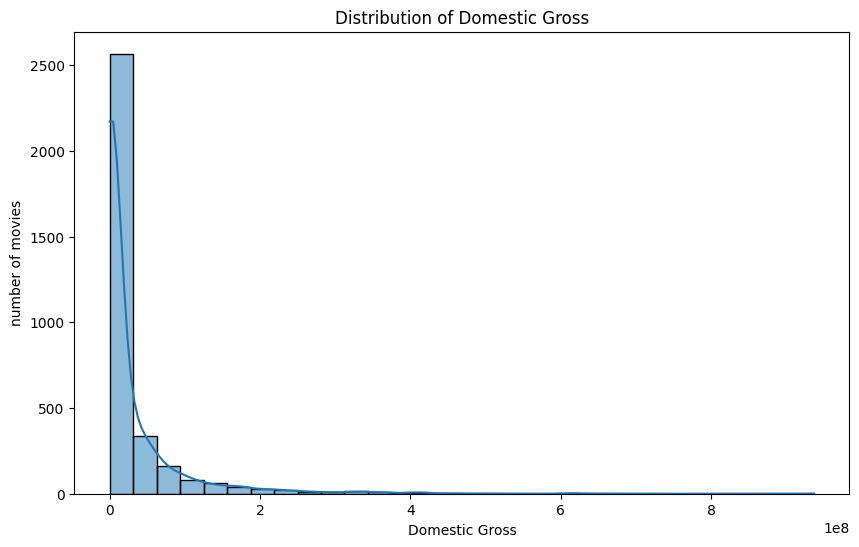

In [446]:
#distribution on domestic gross
plt.figure(figsize=(10, 6))
sns.histplot(df_gross['domestic_gross'], bins=30, kde=True)
plt.title('Distribution of Domestic Gross')
plt.xlabel('Domestic Gross')
plt.ylabel('number of movies')
plt.show()

in the above chart most movies earn a small amount at the box office, while only a few make more money.

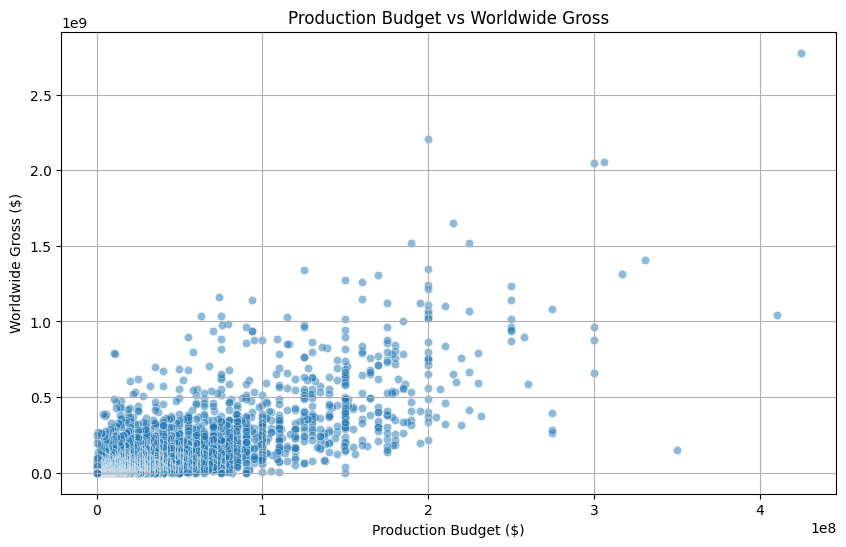

In [447]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_budgets, x='production_budget', y='worldwide_gross', alpha=0.5)
plt.title('Production Budget vs Worldwide Gross')
plt.xlabel('Production Budget ($)')
plt.ylabel('Worldwide Gross ($)')
plt.grid(True)

in the above scatter plot helps us understand whether spending more on production leads to higher global earnings.we can clearly see that movies with higher production budgets generally earn more at the global box office.

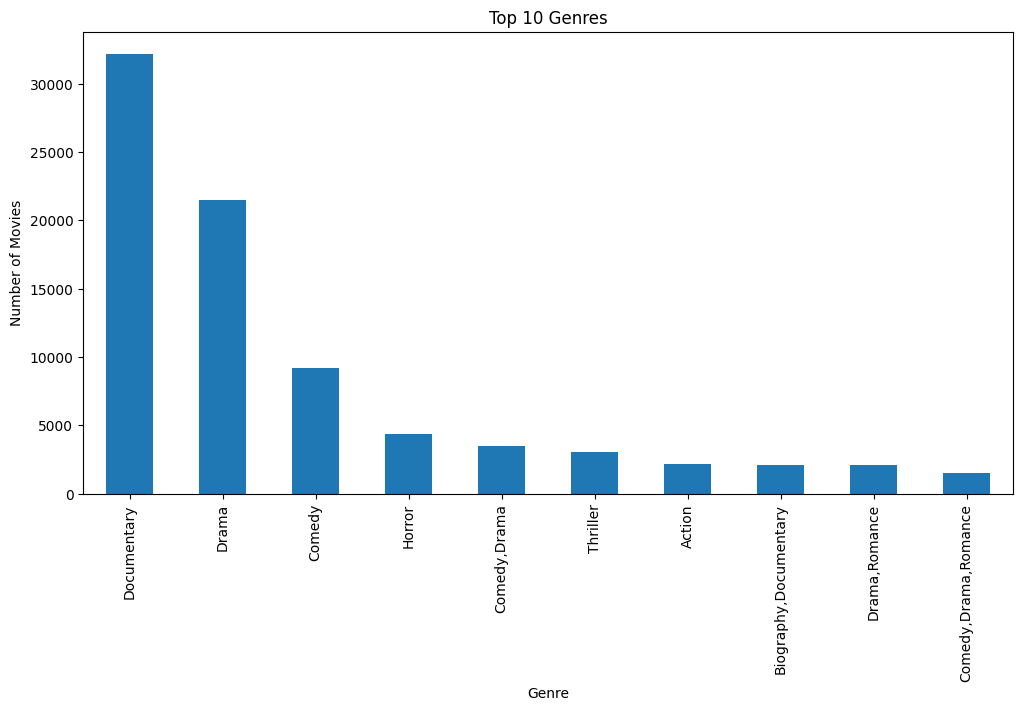

In [448]:
# Distribution of genres (bar plot of top 10)
plt.figure(figsize=(12,6))
df_basic['genres'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Genres')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.show()

in the above bar plot we can see that genres like Drama, Comedy, and Action are the most common this suggests that these are the most popular and widely produced types of movies.

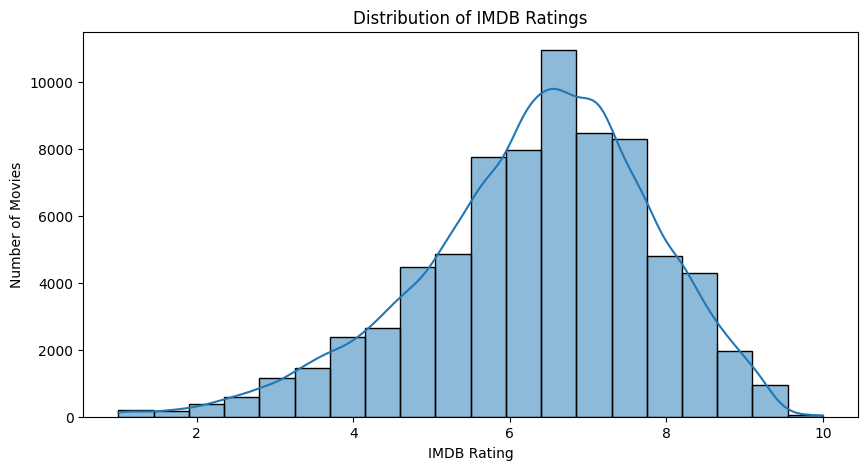

In [449]:
# Distribution of average ratings
plt.figure(figsize=(10,5))
sns.histplot(df_ratings['averagerating'], bins=20, kde=True)
plt.title('Distribution of IMDB Ratings')
plt.xlabel('IMDB Rating')
plt.ylabel('Number of Movies')
plt.show()

The histogram above shows that most movies have average IMDB ratings between 5 and 8, suggesting that most films are viewed as average to good, with only a few rated very low or very high.

**8. seperating the data in subsets**

In [450]:
df_basic['main_genre'] = df_basic['genres'].str.split(',').str[0]

In [451]:
df_merged = pd.merge(df_basic, df_ratings, on='tconst')
df_merged = pd.merge(df_merged, df_gross, left_on='primary_title', right_on='primary_title')

In [452]:
print(df_merged.columns)

Index(['tconst', 'primary_title', 'original_title', 'start_year',
       'runtime_minutes', 'genres', 'main_genre', 'averagerating', 'numvotes',
       'studio', 'domestic_gross', 'foreign_gross', 'year'],
      dtype='object')


**9.subsets and group analysis**

In [453]:
top_genres = ['Drama', 'Comedy', 'Action']

df_merged['rating_group'] = pd.cut(df_merged['averagerating'], bins=[0, 5.5, 7.0, 10], labels=['Low', 'Average', 'High'])
df_filtered = df_merged[df_merged['main_genre'].isin(top_genres)]

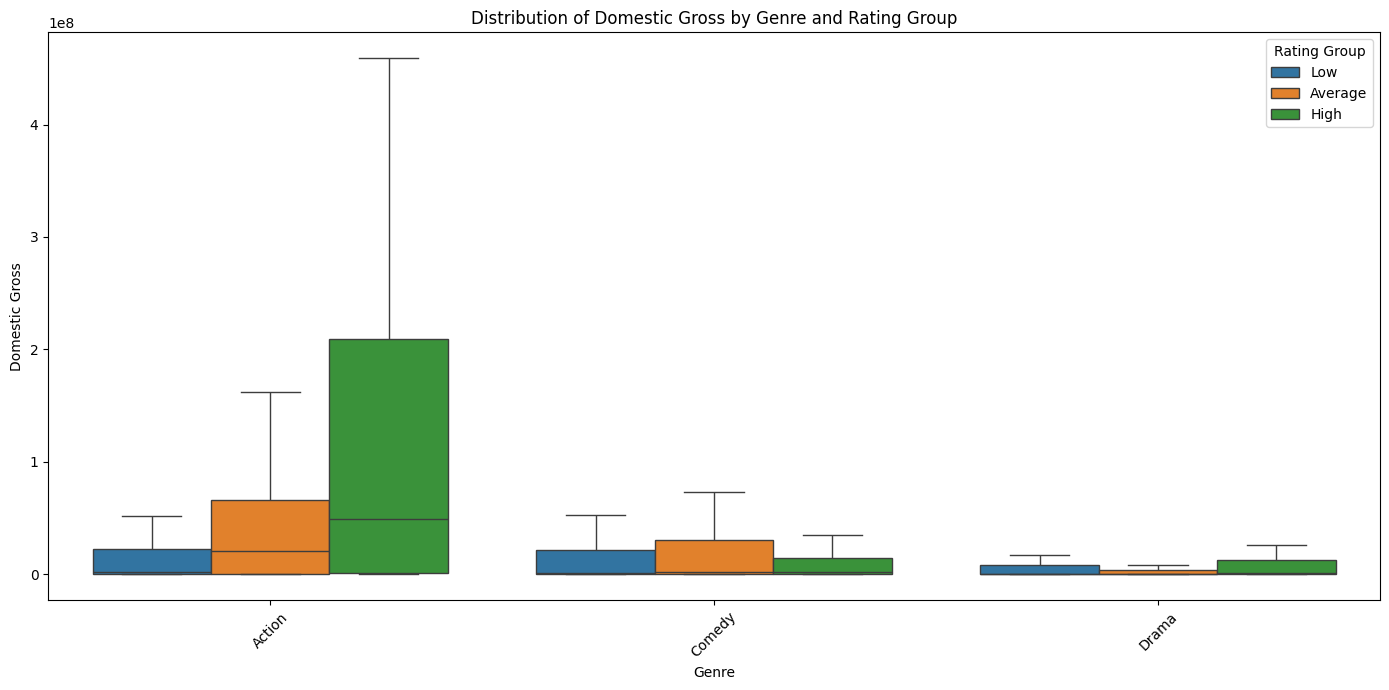

In [454]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))
sns.boxplot(data=df_filtered, x='main_genre', y='domestic_gross', hue='rating_group', showfliers=False)

plt.title('Distribution of Domestic Gross by Genre and Rating Group')
plt.xlabel('Genre')
plt.ylabel('Domestic Gross')
plt.legend(title='Rating Group')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

in the above its clear that a movie's genre and how well it's rated both affect how much money it makes. Good movies in popular genres are the most successful at the box office.

**10. calculating correlations - the aim is to find features that are more strongly correlated with domestic gross.**

In [455]:
numeric_cols = df_merged.select_dtypes(include=[np.number])

correlations = numeric_cols.corr()['domestic_gross'].sort_values(ascending=False)
print(correlations)

domestic_gross     1.000000
numvotes           0.666644
runtime_minutes    0.128156
averagerating      0.120896
start_year         0.037130
year               0.008202
Name: domestic_gross, dtype: float64


In [456]:
strongest_positive = correlations[1:].idxmax()
strongest_negative = correlations.idxmin()

print(f"Strongest positive correlation: {strongest_positive} ({correlations[strongest_positive]:.2f})")
print(f"Strongest negative correlation: {strongest_negative} ({correlations[strongest_negative]:.2f})")

Strongest positive correlation: numvotes (0.67)
Strongest negative correlation: year (0.01)


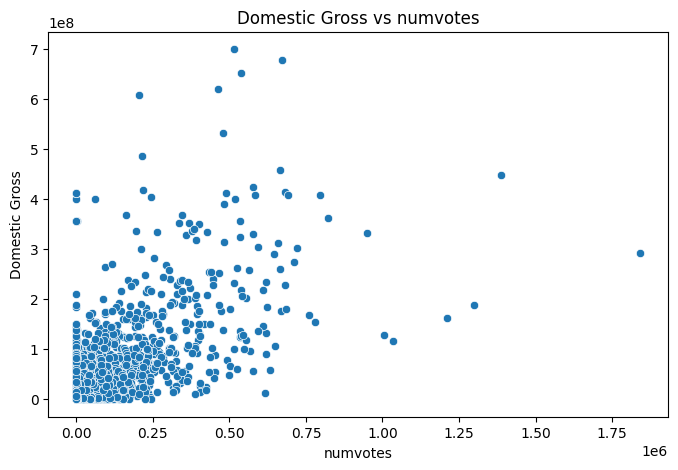

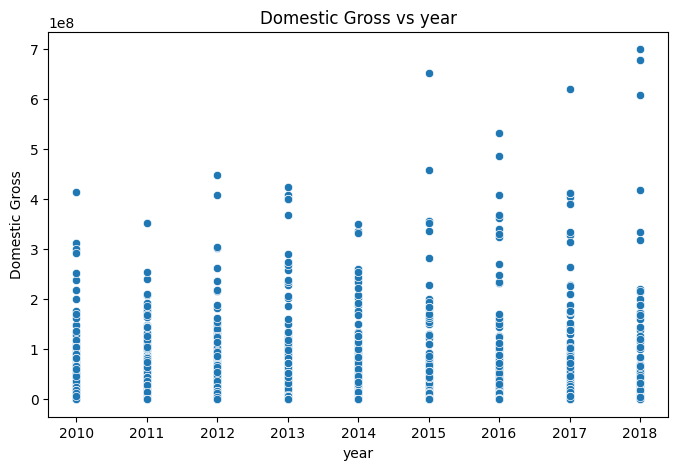

In [457]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=df_merged[strongest_positive], y=df_merged['domestic_gross'])
plt.title(f'Domestic Gross vs {strongest_positive}')
plt.xlabel(strongest_positive)
plt.ylabel('Domestic Gross')
plt.show()

plt.figure(figsize=(8,5))
sns.scatterplot(x=df_merged[strongest_negative], y=df_merged['domestic_gross'])
plt.title(f'Domestic Gross vs {strongest_negative}')
plt.xlabel(strongest_negative)
plt.ylabel('Domestic Gross')
plt.show()

The first plot shows that movies with more audience votes tend to earn more compared to those with less audience votes.
the second shows that longer movies tend to earn less this highlights key factors linked to box office success.

**11.Engineer and Explore a New Features**

In [458]:
df_merged['start_year'] = pd.to_numeric(df_merged['start_year'], errors='coerce')
df_merged = df_merged.dropna(subset=['start_year'])

CURRENT_YEAR = 2025
df_merged['movie_age'] = CURRENT_YEAR - df_merged['start_year']

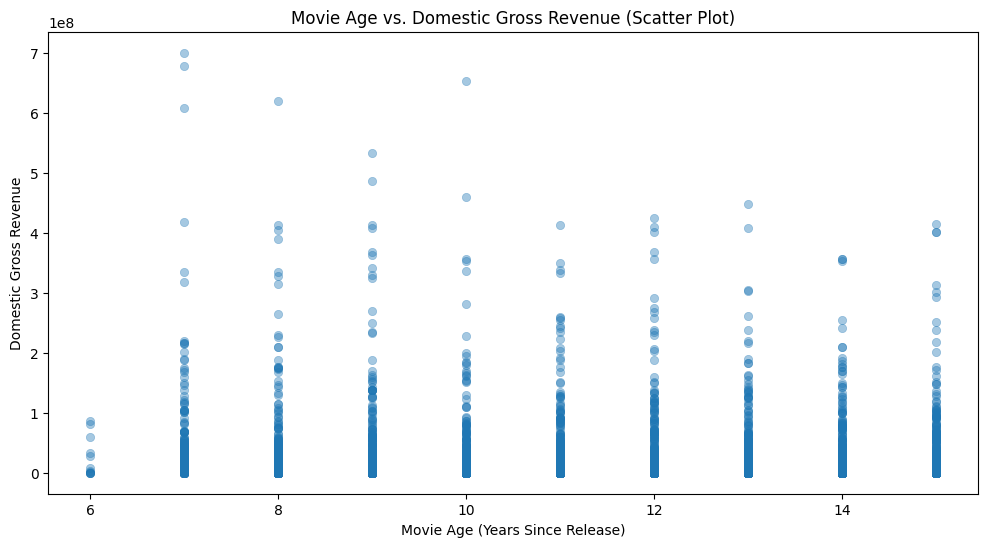

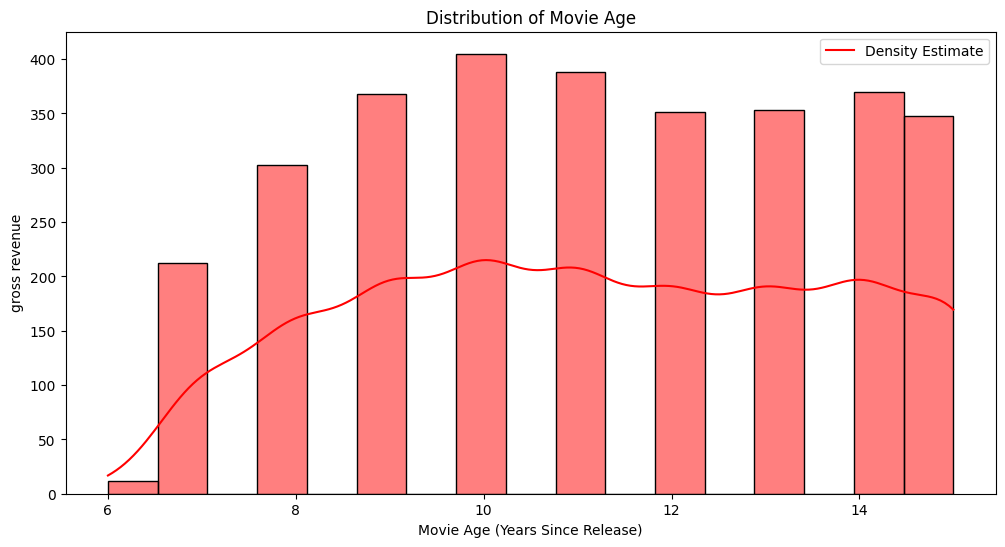

In [459]:
df_merged['domestic_gross'] = pd.to_numeric(df_merged['domestic_gross'], errors='coerce')

df_merged.dropna(subset=['domestic_gross'], inplace=True)

plt.figure(figsize=(12, 6))
sns.scatterplot(x='movie_age', y='domestic_gross',data=df_merged,alpha=0.4,edgecolor=None)
plt.title('Movie Age vs. Domestic Gross Revenue (Scatter Plot)')
plt.xlabel('Movie Age (Years Since Release)')
plt.ylabel('Domestic Gross Revenue')
plt.show()

# Histogram of Movie Age
plt.figure(figsize=(12, 6))
sns.histplot(x='movie_age',data=df_merged,kde=True,color='red',line_kws={'label':"Density Estimate"})
plt.title('Distribution of Movie Age')
plt.xlabel('Movie Age (Years Since Release)')
plt.ylabel('gross revenue')
plt.legend()
plt.show()

The histogram shows that most movies make a small to average amount of money but a s but a few make a lot and earn very high box office returns this means that while success is rare investing in the right blockbuster can bring big profits.

In [460]:
top5_genres = df_merged['main_genre'].value_counts().head(5).index.tolist()
print(top5_genres)

['Drama', 'Action', 'Comedy', 'Biography', 'Adventure']


In [461]:
df_top5 = df_merged[df_merged['main_genre'].isin(top5_genres)]

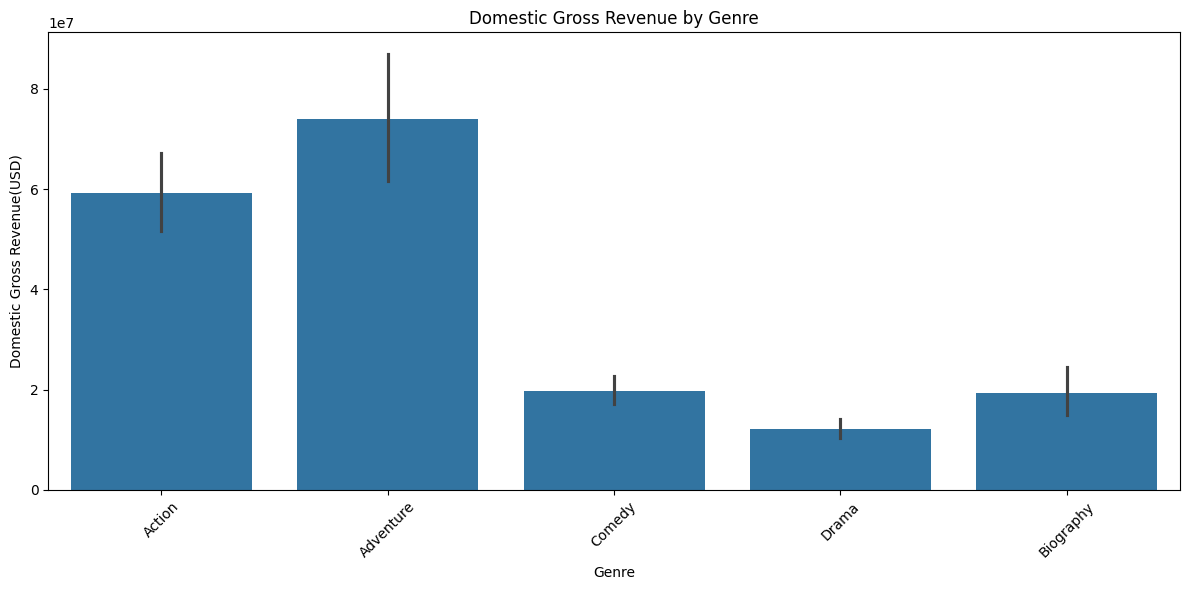

In [462]:
plt.figure(figsize=(12, 6))
sns.barplot(x='main_genre', y='domestic_gross', data=df_top5)
plt.title('Domestic Gross Revenue by Genre')
plt.xlabel('Genre')
plt.ylabel('Domestic Gross Revenue(USD)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The chart above shows that Action and Adventure movies usually make more money and have more big hits.

***BUSINESS RECOMMENDATIONS***


1. Microsoft should make Movies People Like to Watch - from our findings we can clearly see that action movies, adventure, and Comedy movies usually make the most money. Microsoft should focus on making more movies in these types if they want to make more money.
2. Microsoft should focus on making good quality movies - it should focus on movies that people rate highly as seen in our data those that have a rate of (7 out of 10 or better) since they tend to earn more money this will help Microsoft get more returns from the movies.
3. Microsoft should keep releasing new movies -
new movies make more money than old ones so microsoft should keep putting out new films every year to keep fans interested and make more money.

**CONCLUSION**
From the findings we got its clear that the type of movie, how good it is, and how new it is all affect how much money it makes at the box office. If Microsoft makes good-quality Action, Adventure, and Comedy movies and keeps releasing new ones regularly, it has a better chance of making successful movies and becoming a well-known studio.